# Task-02

### **Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.**

Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python



# Step 1: Set Up Environment

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


# Step 2: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Step 3: Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is named 'Mall_Customers.csv'
df = pd.read_csv('Mall_Customers.csv')


Saving Mall_Customers.csv to Mall_Customers (1).csv


# Step 4: Exploratory Data Analysis (EDA)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000  

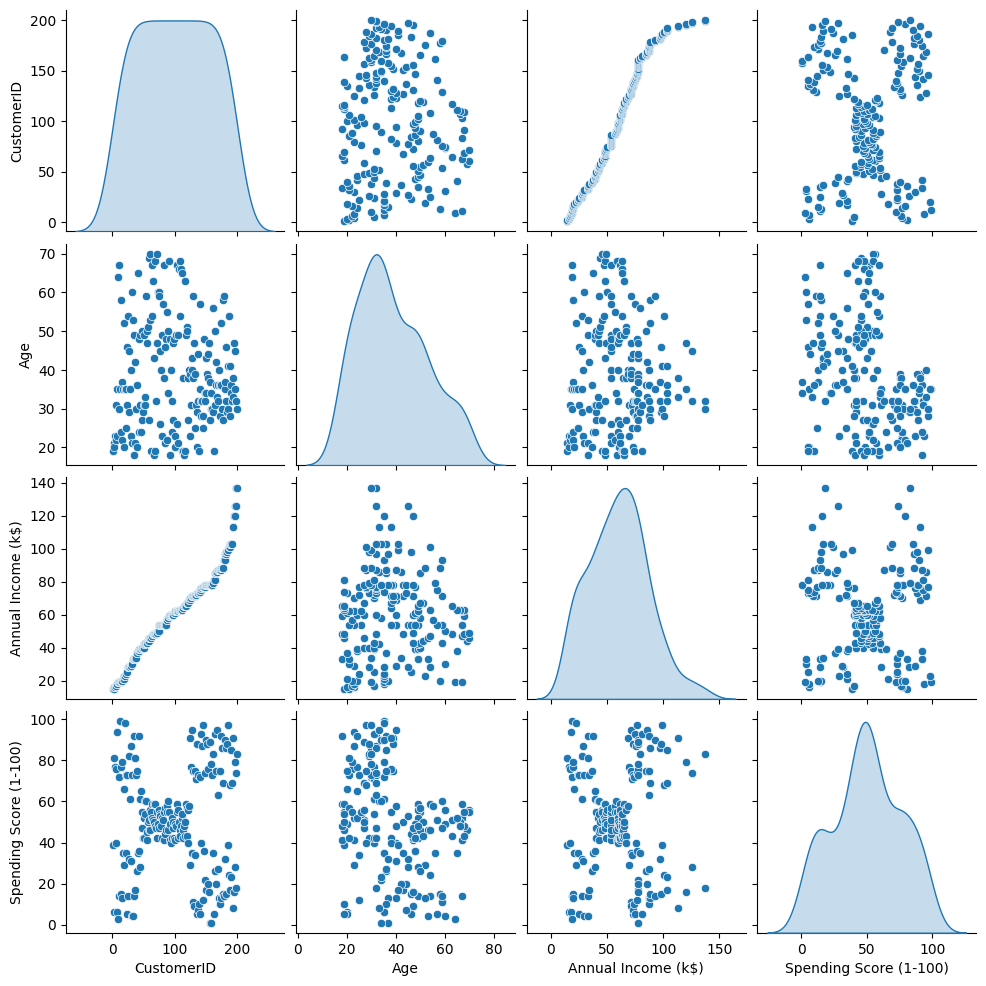

In [ ]:
# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# Pairplot for initial visualization
sns.pairplot(df, diag_kind='kde')
plt.show()


# Step 5: Data Preprocessing

In [ ]:
# Dropping non-numeric columns for clustering
X = df.drop(['CustomerID', 'Gender'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 6: Determine Optimal Number of Clusters
# Using the Elbow Method to find the optimal number of clusters.

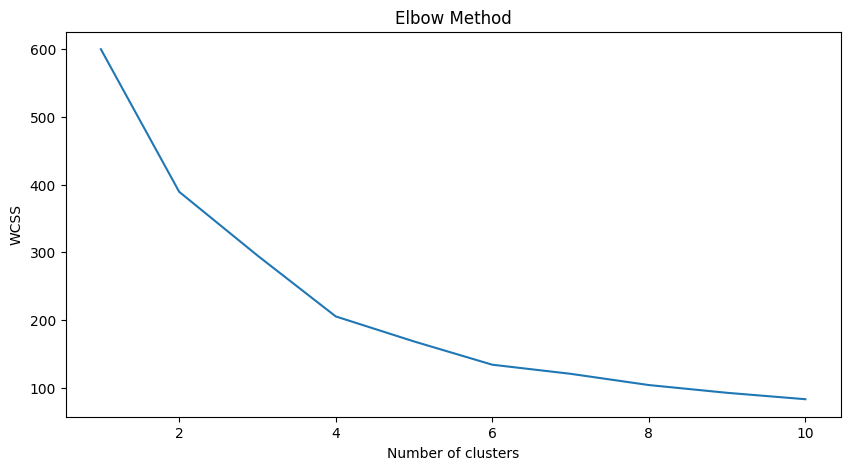

In [ ]:
# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Step 7: Apply K-Means Clustering
# Choose the optimal number of clusters (e.g., 5 based on the Elbow Method).

In [ ]:
# Applying K-means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans


# Step 8: Visualize the Clusters
# Using PCA for dimensionality reduction to visualize the clusters in 2D.

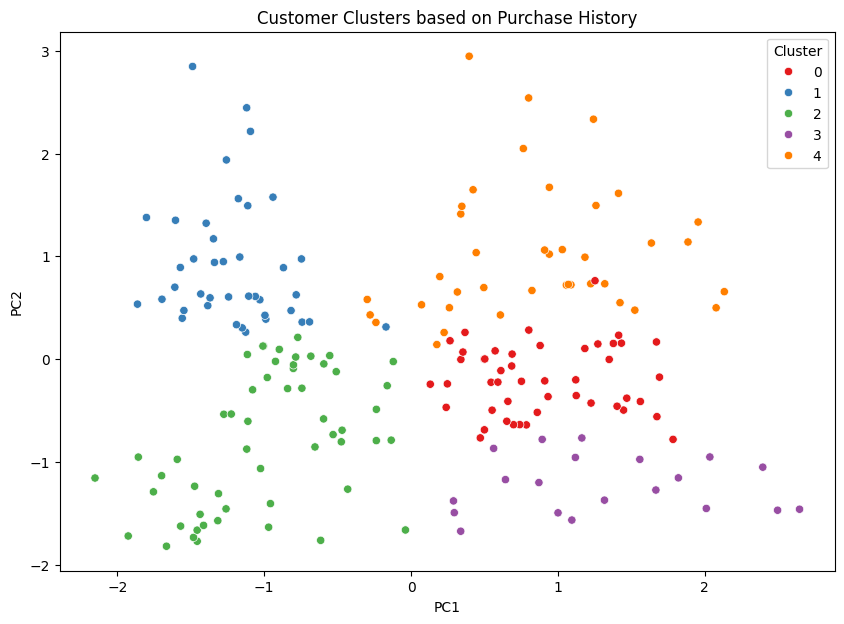

In [ ]:
# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Creating a dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = y_kmeans

# Plotting the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Customer Clusters based on Purchase History')
plt.show()
